Feature 0: 0.025103
Feature 1: 0.127298
Feature 2: 0.000000
Feature 3: 0.012568
Feature 4: 0.051196
Feature 5: 0.063775
Feature 6: 0.014128
Feature 7: 0.101276


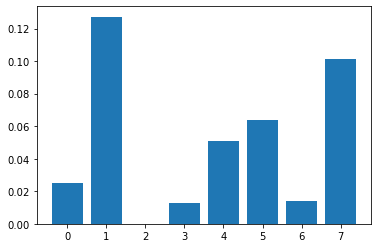

In [2]:
# example of mutual information feature selection for numerical input data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
 
# load the dataset for predictive
def load_dataset(diabetes):
    # load the dataset as a pandas DataFrame
    data = read_csv("data/diabetes.csv", header=None)
    # retrieve numpy array
    diabetes = data.values
    # split into input (X) and output (y) variables
    X = diabetes[:, :-1]
    y = diabetes[:,-1]
    return X, y
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset("data/diabetes.csv")
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()